In [32]:
import pandas as pd
import torch
from torch_geometric.data import Data
from sklearn.preprocessing import LabelEncoder

# Read the data from the Excel file
data = pd.read_excel('40000.xlsx')

data = data.iloc[:1000,:]

# Initialize LabelEncoders
label_encoders = {}
categorical_columns = ['CompanyName', 'Customers', 'Continent', 'Country']

# Label encode categorical columns
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Mapping for label
label_map = {'yes': 1, 'no': 0}

# Process nodes and features
node_features = []
node_labels = []
for _, row in data.iterrows():
    label = row['Top500']
    label = label_map[label]
    node_labels.append(label)

# Process edges
edges = []
for _, row in data.iterrows():
    company_name = row['CompanyName']
    customers = row['Customers']
    edges.append([company_name, customers])

# Convert data to PyTorch tensors
x = torch.tensor(data[categorical_columns].values, dtype=torch.long)
y = torch.tensor(node_labels, dtype=torch.float).view(-1, 1)
edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()

# Create PyTorch Geometric Data object
data = Data(x=x, edge_index=edge_index, y=y)

# Save the data object
torch.save(data, 'processed_data_sample.pt')


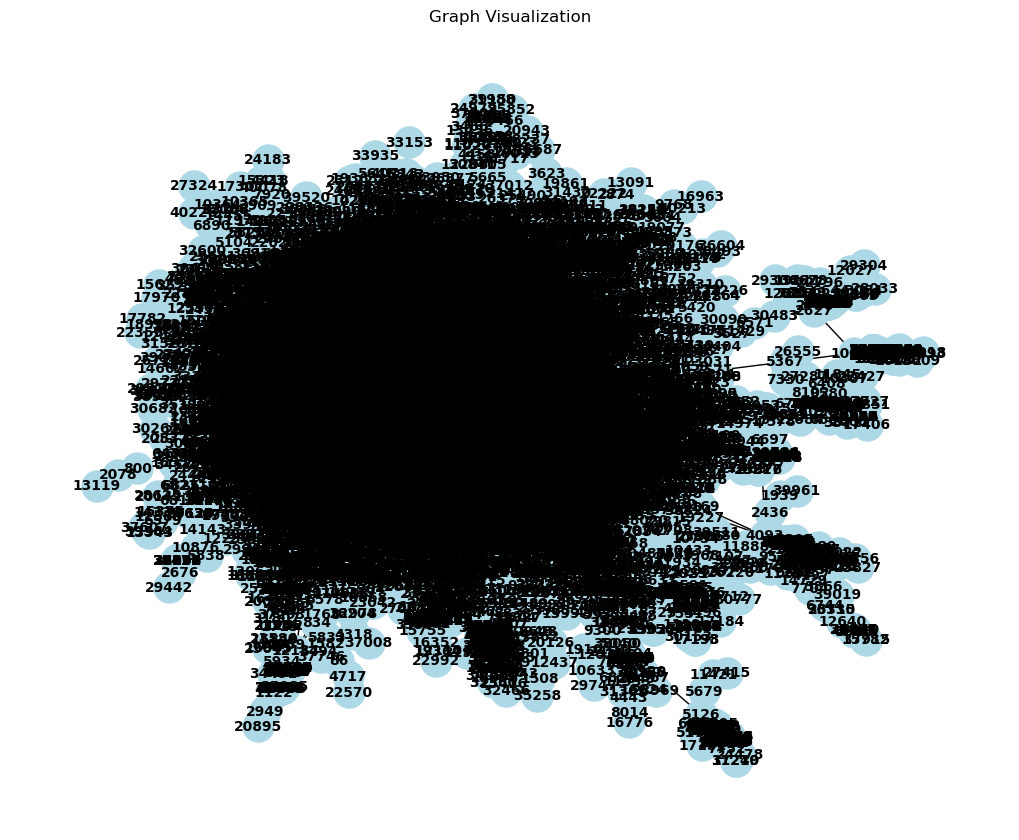

In [14]:
import torch
import torch_geometric
import networkx as nx
import matplotlib.pyplot as plt

# Load the saved data
data = torch.load('processed_data.pt')

# Convert edge index to NetworkX graph
edge_index = data.edge_index.numpy()
G = nx.Graph()
for edge in edge_index.T:
    G.add_edge(edge[0], edge[1])

# Visualize the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)  # Position nodes using Fruchterman-Reingold force-directed algorithm
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
plt.title('Graph Visualization')
plt.show()


In [33]:
from pyvis.network import Network
import torch
import numpy as np

# Load the saved data
data = torch.load('processed_data_sample.pt')

# Convert edge index to edge list
edge_index = data.edge_index.numpy()
edges = [(int(edge[0]), int(edge[1])) for edge in edge_index.T]  # Ensure int types for edges

# Convert node features to Python lists
node_labels = data.x[:, 0].cpu().numpy().astype(int).tolist()  # Convert to NumPy array, ensure int types, then to Python list

# Check the type of the node series in DataFrame
# Assuming the DataFrame is named df
# print(type(df['node']))

# Create a pyvis network
g = Network(height='750px', width='100%', directed=True)

# Add nodes and edges to the network
g.add_nodes(range(len(node_labels)))
g.add_edges(edges)

# Set node labels
for i, label in enumerate(node_labels):
    g.nodes[i]['label'] = str(label)  # Use node label as label

# Save as HTML with custom template
g.show_buttons(filter_=['physics'])
g.write_html('graph_sample.html')
